Question 2

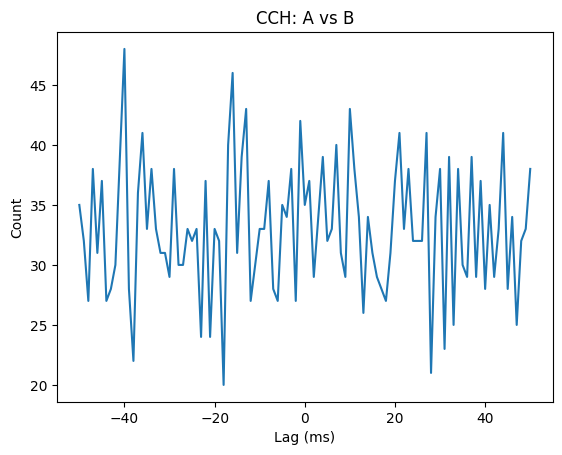

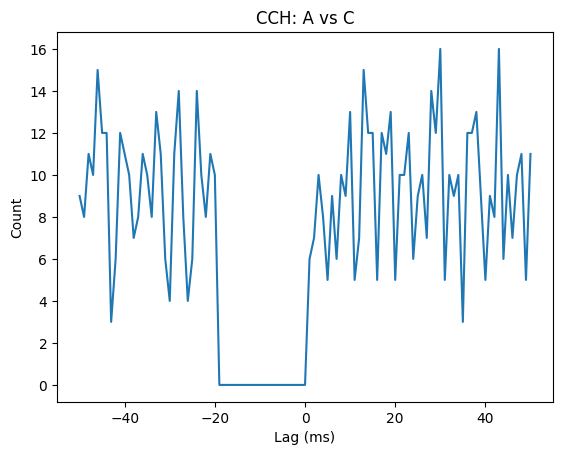

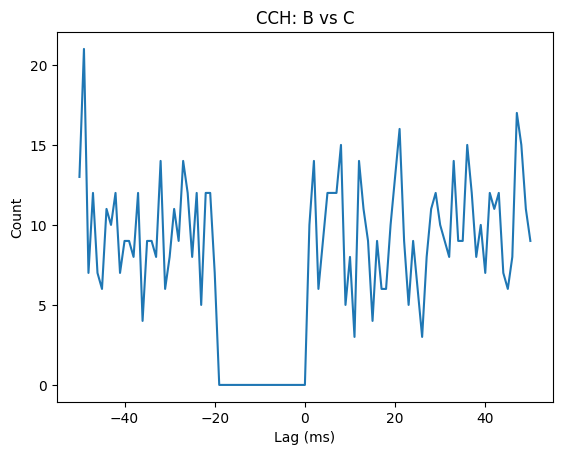

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# הגדרות סימולציה
duration = 100_000  # משך ב- ms (100 שניות)
dt = 1              # רזולוציה ב- ms
time = np.arange(0, duration, dt)

# שיעורי ירי (במספר פיקים ל-ms)
rate_C = 5 / 1000   # נוירון C: 5 פיק לשניה
rate_A = 20 / 1000  # נוירון A: 20 פיק לשניה
rate_B = 20 / 1000  # נוירון B: 20 פיק לשניה
inh_dur = 20        # משך דיכוי ב- ms לאחר כל פיק של C

# סימולציית נוירון C (Poisson)
C = (np.random.rand(duration) < rate_C).astype(int)

# הסתברויות ירי ראשוניות לנוירונים A ו-B
p_A = np.full(duration, rate_A)
p_B = np.full(duration, rate_B)

# יישום דיכוי משותף: אחרי כל פיק של C, מדכאים A ו-B למשך inh_dur
c_spikes = np.where(C)[0]
for t0 in c_spikes:
    p_A[t0:t0+inh_dur] = 0
    p_B[t0:t0+inh_dur] = 0

# סימולציית A ו-B
A = (np.random.rand(duration) < p_A).astype(int)
B = (np.random.rand(duration) < p_B).astype(int)

# פונקציה לחישוב cross-correlation
def compute_cch(spike1, spike2, maxlag=50):
    lags = np.arange(-maxlag, maxlag+1)
    counts = np.zeros_like(lags, dtype=int)
    t1 = np.where(spike1)[0]
    t2 = np.where(spike2)[0]
    for t in t1:
        diffs = t2 - t
        valid = diffs[(diffs >= -maxlag) & (diffs <= maxlag)]
        for d in valid:
            counts[d + maxlag] += 1
    return lags, counts

# חישוב CCH לכל זוג
lags_ab, cch_ab = compute_cch(A, B)
lags_ac, cch_ac = compute_cch(A, C)
lags_bc, cch_bc = compute_cch(B, C)

# ציור התוצאות
plt.figure()
plt.plot(lags_ab, cch_ab)
plt.title("CCH: A vs B")
plt.xlabel("Lag (ms)")
plt.ylabel("Count")

plt.figure()
plt.plot(lags_ac, cch_ac)
plt.title("CCH: A vs C")
plt.xlabel("Lag (ms)")
plt.ylabel("Count")

plt.figure()
plt.plot(lags_bc, cch_bc)
plt.title("CCH: B vs C")
plt.xlabel("Lag (ms)")
plt.ylabel("Count")

plt.show()


Question 3: 

[ 27.  17.  19.  22.  20.  14.  11.  13.  20.  17.  22.  25.  89. 101.
 100.  90. 101. 124. 115. 110. 110. 107.   2.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
[ 27.  17.  19.  22.  20.  14.  11.  13.  20.  17.  22.  25.  89. 101.
 100.  90. 101. 124. 115. 110. 110. 107.   2.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
Mean firing rate before stim: 21.52 spikes/s
Stimulation rate: 0.83 events/s
Mean firing rate after stim: 23.13 spikes/s


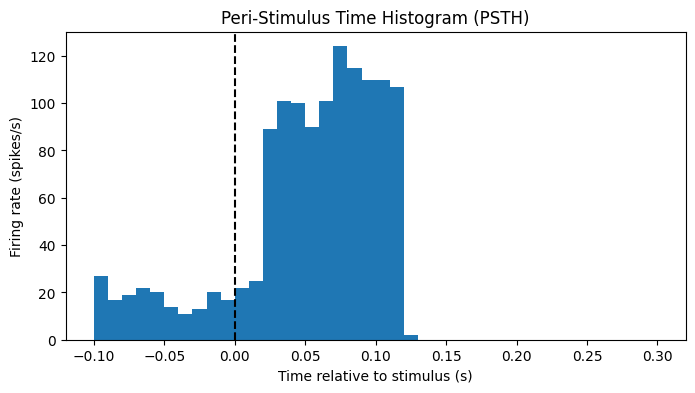

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

spike_times = pd.read_csv('Q3spikeTime.csv').values.flatten()
stim_times = pd.read_csv('Q3stimTime.csv').values.flatten()

t0 = stim_times.min()  # first stimulus time
spikes_pre = spike_times[spike_times < t0]
rate_pre = len(spikes_pre) / t0 
# num of spike/time bin

#Stimulation rate (events per second)
total_time = spike_times.max()  # assume recording duration = last spike time
stim_rate = len(stim_times) / total_time

#Effect on mean firing rate: compare pre- vs post-stim
spikes_post = spike_times[spike_times >= t0]
duration_post = total_time - t0
rate_post = len(spikes_post) / duration_post

#PSTH: peri-stimulus histogram
window = [-0.1, 0.3]  # seconds before and after
bin_width = 0.01     # 10 ms bins
bins = np.arange(window[0], window[1] + bin_width, bin_width)

# Build PSTH
all_counts = np.zeros(len(bins)-1)
for t in stim_times:
    # align spike times to each stim event
    aligned = spike_times - t
    counts, _ = np.histogram(aligned, bins)
    all_counts += counts
psth = all_counts / len(stim_times) / bin_width  # rate in sp/s

print(all_counts)
print(psth)

# Display results
print(f"Mean firing rate before stim: {rate_pre:.2f} spikes/s")
print(f"Stimulation rate: {stim_rate:.2f} events/s")
print(f"Mean firing rate after stim: {rate_post:.2f} spikes/s")

# Plot PSTH
plt.figure(figsize=(8, 4))
plt.bar(bins[:-1], psth, width=bin_width, align='edge')
plt.xlabel('Time relative to stimulus (s)')
plt.ylabel('Firing rate (spikes/s)')
plt.title('Peri-Stimulus Time Histogram (PSTH)')
plt.axvline(0, color='k', linestyle='--')
plt.show()
